# Transitive Closure: a primer on compute performance

We learn by discovering relationships between ideas.

We can document these connections using the notation of sets and recording the relations between items in those sets.
Combining these relations can help us discover new connections between items. Combining relations is call relation composition.

We can "see" relations by viewing them as a graph.
In graph form, relations are treated as networks of connected nodes.
The connections between items in the relation are visualized as edges between the nodes in the graph.
Graphs allow us to visually explore connected items and discover new relationships by following the edges that make up the paths between nodes.

## Example Relations

For example, social networks contain many familiar relations like "friend of" and can be drawn as a graph where nodes represent people and edges between them represent their friendships.
Another network we interact with every day is the World Wide Web.   Relations between web pages are defined by the hyperlinks between pages. The web can be visualized as a network called the web graph.  Here the web pages are nodes and the links between web pages are the edges.

We might also have data sets that describe two different relations between items and composing them could help discover secondary relationships.  For example, there are data sets that document drugs which are known to activate specific genes and other data sets that tells us which genes activate other genes. By composing these relations, we can discover drugs which could be investigated to activate genes indirectly through other genes.  This would give us a way to control genes that can't be directly controlled through known drug interactions. 

## A Network of Friends
Let's summarize these ideas with an example of a relation draw as a graph. It is a simple social network for the "friends of" relation between four imaginary people $\{ a, b, c, d \}$. We draw it using the [R's igraph library](https://igraph.org/r/doc/) and powerful plotting routines.  The nodes in the graph represent the people and the edges their "friends of" relation.  We can visually compose the "friend of a friend" transitive relation and discover that $(b,d)$ are members of that relation because $b$ is a "friend of" $c$ and $c$ is a "friend of" $d$.

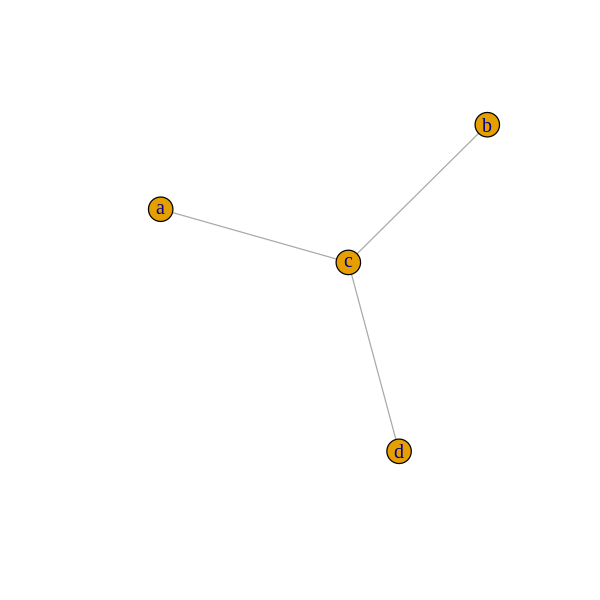

In [31]:
library(igraph)
options(repr.plot.width=5, repr.plot.height=5)
friends <- matrix(c(0,0,1,0, 0,0,1,0, 1,1,0,1,  0,0,1,0), nc=4,
               dimnames=list(c('a', 'b', 'c', 'd'), c('a', 'b', 'c', 'd')))
g <- graph_from_adjacency_matrix( friends, diag=FALSE, mode="undirected" )
plot(g)

## Sets and relations

Let's review the language of [relations and their composition](https://pages.mtu.edu/~nilufer/classes/cs2311/2012-march/cs2311-s12-ch9-relations-part2.pdf#slide.1).

Let's say we have a set of people $\{ a, b, c, d \}$ and know a parent-child relation, $R = \{(a,b)\}$,  and two sibling relations, $S=\{(b,c),(b,d)\}$, on that set.
Given this information, we can compose, or compute, the relation of aunts or uncles between items in the set.
That is we can deterime the composed relation $S \circ R=\{(a,c),(a,d)\}$, which tells us that person $a$ is a "nephew or neice of" persons $c$ and $d$.
Or conversly, that persons $c$ and $d$ are an "aunt or uncle of" person $a$.
An aunt (or uncle) is a person who is a sibling of a parent.
Therefore, if we know $a$ is a "child of" $b$, $aRb$, and $b$ is "sibling of" $c$ and $d$,  $bSc$ and $bSd$, then the composition of the relation, $R \circ S$, tells us which people have aunt or uncle relationships.

This new, composed relation $S \circ R$ defines a transitive relation.
Transitive means if $a$ is related to $b$ and $b$ is related to $c$ then $a$ is also related to $c$.
In other words, the connection between $a$ and $c$ transits across $b$.
In graph terms, there is a path between $a$ and $c$ that passes through $b$.

Transitive relationships can transit any number of intermediate items.
For example, we could have a transitive relationship between $a$ and $d$ because we know relationships where $a$ is related to $b$, $b$ is related to $c$, and $c$ is related to $d$. In a graph, we would call that a path between $a$ and $d$ of length three.

Transitivity is a property of some relations. Not all relations are transitive. 
When a relation is transitive, however, it provides a powerful tool for discovering connections between items.

The transitive closure of a set contains all the relationships in a set that result from applying the transitive relation on the set.
A closure is just the complete collection of all the relationships in which we are interested.
The transitive closure can be computed by following all the connections between the nodes that are defined by the transitive relation, repeatedly applying the relation to the set until all pairs are documented.
If we have a relation $R$, we can compute the transitive closure $R^*$, which is a new relation that contains the original relation and the complete collection of transitive relationships of any length between items in the set.

## Matrix notation for relations

Relations can be conveniently represented as a matrix.
The $n$ items in the set define the $n$ rows and $n$ columns of an $nxn$ matrix.
The relation is represented by putting a one in the matrix entry $i,j$ if there is a relation between element $i$ and $j$ of the set and a zero if there is not.
This gives us a binary matrix of $1$'s and $0$'s.

Let's represent our relations above in matrix form.
We'll use the R language in these examples, mainly because it has native support for matrix representations which simplifies this discussion and it has great [plotting support if we want to visualize our networks](https://hal.archives-ouvertes.fr/hal-01722543).

Let's define a list to represent the items in our set $\{a, b, c, d\}$.  These are names of our people.  Defining them as a list makes it easier to use the names when we we create the matrix. Good labels make data easier to read.

In [2]:
person = c('a','b','c','d')

Our first relation $R$ described the "child of" relation between $a$ and $b$.  Let's represent this in matrix form as $M_R$

[In R we create a matrix with the matrix() function](https://www.tutorialspoint.com/r/r_matrices.htm) and pass it our data, matrix dimensions, and names for the dimensions. We'll use the person names to name the dimensions.  Since we have four items in the set, the matrix will be four rows by four columns and have 16 entries.  The data is represented as a list of zeros and ones, where a one represents a relation between two items in our set.  We will read the entries by row to make the input list a little easier to read for those of us who read matrices in row-major order.  In this example, the second entry in the list will populate the cell in row $a$ and column $b$, meaning $a$ is a "child of" $b$.

In [3]:
M_R <- matrix( c(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), nrow=4, byrow=TRUE, dimnames=list(person,person))
print(M_R)

  a b c d
a 0 1 0 0
b 0 0 0 0
c 0 0 0 0
d 0 0 0 0


We'll also create a matrix $M_S$ for our "sibling of" relation.  Recall that $b$ is a sibling of $c$ and $d$, which means there are ones in entries $(b,c)$ and $(b,d)$ of the matrix.

In [4]:
M_S <- matrix( c(0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0), nrow=4, byrow=TRUE, dimnames=list(person,person))
print(M_S)

  a b c d
a 0 0 0 0
b 0 0 1 1
c 0 0 0 0
d 0 0 0 0


## Composing Relations with Matrix Multiplication

Composing relations represented as a matrix is simple.
[We can use matrix multiplication to compute transitive relations.](http://www.facweb.iitkgp.ac.in/~niloy/COURSE/Autumn2008/DiscreetStructure/scribe/Lecture07CS1039.pdf)
If we have two relations $R$ and $S$ over a set of $n$ items, then we an represent each relation in its $nxn$ binary matrix form as $M_R$ and $M_S$.
The composition of relation $S \circ R$ is the multiplication of matrix $M_R$ and matrix $M_S$.  Concisely,  $S \circ R = M_{(R \circ S)} = M_R \odot M_S$.  Binary matrix multiplication, indicated by $\odot$, is discussed below.

This composition gives the transitive relations of length two, i.e. $aRb$ and $bSc$. We can see from the  result of the matrix computation that $a$ is indeed a "neice or nephew of" $c$ and $d$ because the entries $(a,c)$ and $(a,d)$ contain a $1$.

In [5]:
M_RS=M_R %*% M_S
print(M_RS)

  a b c d
a 0 0 1 1
b 0 0 0 0
c 0 0 0 0
d 0 0 0 0


## Transitive Closure and Matrix Multiplication

More generally, we can compute transitive relations of any length by repeated matrix multiplication.
Each multiplication increases the path length by one.

This makes sense.
If we start with the matrix $M_R$, it contains all the relations of length one.
That is, direct relationships between any pair of items in the set.
If $R$ contains transitive relations, then we can resolve any missing pairs.
If we multiply $M_R * M_R$, we get the transitive relations of length two.
If we do it again and multiply $M_R * (M_R * M_R)$ we get the transitive relations of length three.
The longest interesting path is at most n-1 steps away.
This would be a transitive relation composed by stepping through each item in the set.
This means we can compute the transitive closure of a relation $R$ on an $n$-item set by multiplying the $M_R$ matrix by itself $n-1$ times.
This is simply the $n^{th}$ power of the matrix.
Therefore the transitive closure $R^*$ can be computed as $M_{(R^*)} = (M_R)^n$.

## Boolean Matrix Multiplication

Our use of matrix multiplication for relation composition has been ignoring a detail about the summation step in the vector products embedded in matrix multiplication.
We all know that $1+1=2$.
If there are row and column vectors in our relation matrix that share $1$'s in a number of their dimensions, the summation step in their dot product will produce the result $2$, or $3$, or whatever the count is of dimensions which shared $1$'s.
In the contex of relations, dimensions that share $1$'s indicate a transitive relation.
The result of a matrix multiplication of relation will likely produce many entries with values greater than $1$. 

We are only interested in knowning the existance of relations in our result.
The only value needed for that is a $1$.
We can use Boolean matrix multiplication, represented by $\odot$, to achieve that outcome.

In Boolean math we use logical AND for multiplication and logic OR for addition.
Here, $1 \times 1$ is still $1$ and $1 \times 0$ and $0 \times 0$ are both still $0$.
Boolean multiplication retains its function as a filter for transitive relations.
But with Boolean OR, $1 + 1 = 1$.
In fact, the Boolean result of adding any number of $1$'s and $0$'s will remain $1$, as long as there is at least one $1$ in the summation.
This is perfect for our needs.
Boolean addition records the existance of a transitive relation without being concerned about the degree of connectivity.

Boolean matrix operations are less common.
We can substitute ordinary matrix multiplication by treating any non-zero value as $1$.
To get a relation matrix from this result, we simply normalize all non-zero elements to $1$. 

## The Adjacency Matrix and Graph Connectivity

The relation-as-a-matrix representation makes transitive closure computation extremely useful for determining the connected nodes in a graph.
A graph of $n$ verticies can be represented as an $nxn$ adjacency matrix.
The adjacency matrix has a value of $1$ for entry $i,j$ if the vertices $i$ and $j$ are connected by an edge in the graph and a value of $0$ if there is no edge.

An adjacency matrix is identical to a set representation.
Graphs like social networks or maps of the web can be represented as an adjacency matrix.
Computing the transitive closure of these "relations" identifies all connected nodes in the graph; nodes connected either directly or by a path through intermediate nodes.

It's worth noting that edges, like relations, are not required to be symmetric.
In a directed graph, an edge between $i,j$ doesn't guarantee there is an edge between $j,i$.
A familiar example is the non-symmetric "follows" relation on Instagram.
Just because $a$ follows $b$ doesn't mean $b$ follows $a$, $a=b$ does not mean $b=a$.
A symetric relation describes an undirected graph.
An edge between $i,j$ means there is an edge between $j,i$.
Both entries in the adjaceny matrix are $1$.
For symmetric relations and undirected graphs, the adjacency matrices are square and symmetric.

## Computing Friends of Friends

The "friend" relation can be used to compute a "friend of a friend" relation.
This is the equivalent of finding nodes in the friends social network that are connected by one intermediate node.
In other words, the path length between nodes in the original graph is two.
The composed "friend of a friend" relation is simply the square of the original "friend" relation.
$M_{f \circ f} = (M_{f})^2$

We can easily see friends of friends by plotting $M_{f \circ f}$.
The nodes $a$, $b$, and $d$ are now directly connected in the new relation as friends of friends.
Because $c$ knows all people as friends, it is an unconnected node in the friend of a friend graph.
Composed relations are a powerful tool for communitity detection in graphs.

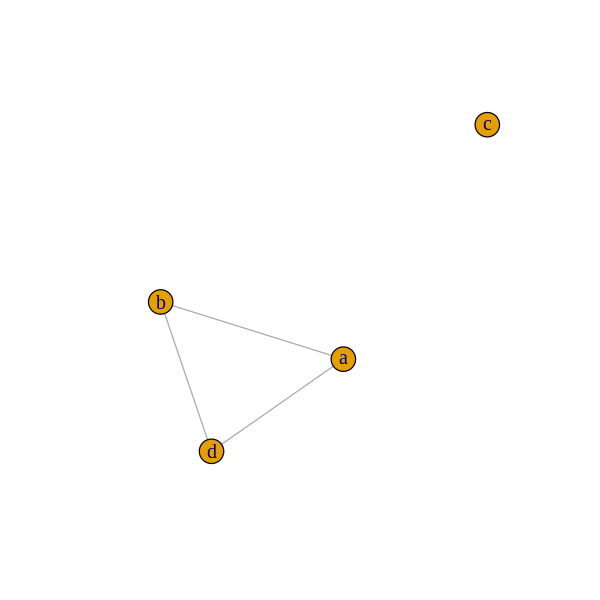

In [33]:
fof = friends %*% friends > 0
g <- graph_from_adjacency_matrix(fof , diag=FALSE, mode="undirected" )
plot(g)

## Compute Performance Considerations

Multiplying logical matrices makes easy work of composing new relations.
Visualizing the new ideas represented by composed relations strengthens our understanding.

Whenever we ask a machine to work for us, however, we need to be interested in, or concern ourselves with, the amount of work we are actually requesting it to carry out.
Work on a computer is measured in instructions.
The machine has to execute many instructions to accomplish the tasks we have set forth.

The time it takes to carry out those instructions is governed by two factors.
The raw speed of the computer as measured in cycles per second.
Generally speaking, a computer can execute one instruction per cycle.
Modern processors use pipelines to keep track of many instructions at a time, with the fastest ones able keep 32 or more instructions moving forward at a time.

With clock speeds around 3GHz and deep pipelines, we can expect our fastest processors to carry out as many as 100 billion instructions per second.
The simpler the instruction the better, with addition being about as simple as it gets.
Keep in mind that multiplication really represents repeated addition operations.

The second factor affecting performance is how fast data can move through the processor.
For a processor to add billions of numbers in a second, it needs to have billions of numbers arriving each second.
When data isn't available, the processor starves.
The cycles it executes go unused.

Making sure the data arrives in time involves planning.
Most of that is managed by the processor itself.
Fast data caches located directly on the processor hold on to the most frequently used data. 
There it can be moved around at processor speeds.
Multiple cache layers work together to gather data from the relatively slow computer memory.
Planning how computations are organized ensures data efficiently moves through the processor and avoids starvation.

## The Computational Cost of Matrix Multiplication

So, is it practical to simply multiply matrices to compose relations or to compute the transitive closure?
We might get away with a naive approach when data sets are small.
Naive means brute force computation.
Brute force computation carry out all the multiplication and addition instructions expected for standard matrix multiplication.

Multiplying two $nxn$ matrices requires carring out $n^3$ operations; there are $n^2$ entries in an $nxn$ matrix and each entry is involved in $n$ multiply-add steps.
Therefore, the naive algorithm for mulitiplying two matrices requires on the order of $nxnxn$ or $n^3$ operations.
This approach is bounded by an $O(n^3)$ (read, [big-oh](https://en.wikipedia.org/wiki/Big_O_notation) n-cubed) order computation.
Additionally, the transitive closure requires $n-1$ matrix multiplications.
This means a naive transitive closure computation is really bounded by an $O(n^4)$ order computation.

If our data set is large we should avoid naive computation.
Say we have 100 element set.
A naive computation of transitive closure will require on the order of $100^4$ or 100 million operations.
This is probably not too much to ask of a modern computer.
But remember, the work increases exponentially for every factor of 10 increase in our set of elements.
Data becomes big quickly at that rate.

A 1000 element set will take 1000 times longer than the 100 million operations it took for a 100 element set.
This already accounts for all the instructions it is possible to run in one second on our fastest computers.
Increase the data set by another factor of 10, and now we are waiting 15 minutes.
A set with ten thousand items is not uncommon in an era of big data.
At that scale, we can quickly run into significant wait times or, worse, choose to limit the amount of information from which we are willing to learn.

For example, when modeling gene relationships, social networks or the web, we can easily imagine networks with thousands, millions or even billions of nodes.
Even if we are only trying to composed two or three relations, nodes connected by one or two intermediate nodes, we are still bounded by $O(n^3)$ order computations.
Composing a relation with a million items would take a whole season.
Naive computations quickly become unmanagable at this scale.

## Fast Matrix Multiplication

In 1969 Volker Strassen showed that matrix multiplication $C=AB$ could be organized in a way that avoids having to carry out the full set of operations required by a naive approach.
The [Strassen algorithm](https://en.wikipedia.org/wiki/Strassen_algorithm#Algorithm) partitions each of $A$, $B$ and $C$ into four equal sized block matrices.
It then computes the blocks of $C$ using an arrangement of seven new matrices computed from the blocks of $A$ and $B$.
This gets the work done using seven multiplication instead of the eight needed in a naive approach.
Strassen was able to re-use overlapping sub-problems to reduce the workload.
The approach demonstrated performance bounded by $O(n^{\log_{2}7}) \approx O(n^{2.8})$ instead of the $O(n^3)$ of a naive approach.

Strassen's insight introduced the idea of fast matrix multiplication.
Fast matrix multiplication methods have improved since.
The [state of the art algorithms for fast matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication#Computational_complexity) are bounded by $O(n^{2.373})$.
Keep in mind, however, if we want the transitive closure of a set, we still need $n - 1$ of these multiplications.
This will bump performance to $O(n \times n^{2.373})$ or $O(n^{3.373})$.
This is, of course, still better than the $O(n^4)$ performance of the naive approach.

Can we improve on this performance?

## Shortest Paths in a Graph

From the graph perspective of relations, we know that transitive relations are described by a path between nodes in a graph.
We have been using the value of $1$ to record the existance an edge between nodes.
In a graph, however, it is often very useful to use values other than $1$ to record an edge between nodes.
These values are called weights.
Weighted edges provide a measure for the quality of a connection between nodes.
Values can be positive or negative.
Their meaning depends completely on the problem domain modeled by the graph.

One of the most common uses for weighted edges is to add the path weights and find a shortest path between connected nodes.
For example, a weight of $1/2$ could describe a connection that is half-as-long as some other connection with a weight of $1$.
In the simple case of relations, though, a value of $1$ is sufficient; a relation is a relation.
No further qualification is needed.

To simplify the following conversation, we can assume that all paths are positive.
This is trivially true for an adjacency matrix where we simply set all weights for existing edges to $1$.
Negative edges are technically not a problem in the discussion that follow.
The following algorithms are not designed to work with negative weight cycles in directed acyclical graphs.
This is easily avoided in our dicuss with positive-only edges.
If this is confusing, simply ignore.
Accept that edge weight are positive and move on.

## Repeated Squaring

Computing transitive closure requires that we compute the $n^{th}$ power of the relation matrix, $M_R^n$.
But, it doesn't require that we know each intermediate value, $M_R^2$, $M_R^3$, $M_R^4$, ..., $M_R^n$.
Additionally, if all weights in a graph are positive, the result of repeated multiplication of the adjacency matrix $M_R$ stabilizes at powers above $n-1$.
This stability reflects the situation where the shortest path between two nodes can't be any longer than a path of $n-1$ edges, the maximum number of hops between two nodes.

Given intermediate results aren't needed and edge weights can be guaranteed postive, we can now arrange a more efficient computation for transitive closure, $M_R^n$.
The first multiplication of our relation matrix results in $M_R^2$.
Squaring $M_R^2$ gives $M_R^4$.
Repeating the squaring gives $M_R^8$, $M_R^{16}$, ..., $M_R^{\lceil \log_2(n-1) \rceil}$.
We arrive at the endpoint of our sequence within $\log_2(n-1)$ matrix multiplication operations.

This means we now have a transitive closure computation bound by $O(n^3 \times \log_2n)$.
This is a significant improvement over fast matrix multiplication alone.
We only need as many multiplications as it takes bits to represent $n$, the count of items in our set, as a binary number.
This is a helpful interpretation of $\log_2n$.
For example, it would take only fourteen repeated matrix squarings to compute the transitive closure of a one million item set.
Fourteen $O(n^{2.373})$ operations.
Compare this to the need to make one million fast matrix multiplications, each at $O(n^{2.373})$, if we naively compute all intermediate results.

The advantage of representing a relation in matrix form and then treating it as an adjacency matrix of a graph should now be clear.
Interchangable representations allow us to combine techniques across domains.
We have combined fast matrix multiplication with insights about shortest paths in graphs to significantly reduce the computational requirement for transitive closure.

Can we do better?

## Floyd-Warshall All Pairs Shortest Path Algorithm

Consider a purely graph-based interpretation of the relation.
As adjacency matrix, $M_R$ documents the edges connecting nodes.
Here transitive relations are paths between nodes.
The transitive closure is defined by the connectivity between all nodes across any path.

The Floyd-Warshall algorithm computes the shortest path between all pairs of nodes in a weighted graph.
This algorithm can be applied to compute transitive closure because a non-zero path weight indicates nodes are connected.
If the path costs aren't needed, the entries can be normalized to ${0,1}$.

Floyd-Warshall builds on insight that the maximum number of edges possible in a shortest path is $n-1$.
The algorithm inspects paths of increasing length between each node and keeps track of the shortest one.
Tracking the current shortest path leverages a technique called dynamic programming.
This breaks computations into overlapping steps whose results can be re-used, avoiding needless recomputation.

Floyd-Warshall inspects each of the $n^2$ node pairs in the graph $n-1$ times, one for each increase in path length.
This bounds Floyd-Warshall at $O(n^3)$.

Because it finds the shortest path between all pairs, we end up with a complete set of paths across the graph at the end of the compution.
That is, we now have the full transitive closure in $O(n^3)$ operations.

This is a another significant improvement over using repeated-squaring with fast matrix multiplication for transitive closure.
Any time we can avoid matrix multiplies we should celebrate.
Transitive closure has now been reduced to the cost of one simple matrix mutiplication.

Note that we can't use fast matrix multiplication because we have abandoned use of multiplication as our solution.
We are explicitly inspecting nodes in a graph.
We're simply comparing the performance from where we started.

Is this the best we can do?

## Boolean Matrix Efficiencies

Let's revisit the earlier observation that we are working with logical matrices.
Maticies that contain $0$'s and $1$'s.
Is it possible to leverage Boolean matrix multiplication as a performance advantage?
Boolean operations are the fastest operations on a computer.
Binary data can also be efficiently stored in memory.
Each element of the matrix only needs one bit

Until now we have been working with relations strictly in matrix form.
We have used the relation matrix $M_R$ in matrix multiplication and cast it as an adjacency matrix describing a graph.
What if we let go of matrix representation?

Adjacency lists are an alternative to adjacency matrix representation for graphs.
Each row of the matrix is written as a list of numbers that represent the column numbers that contain a $1$.
This is especially efficient for representing sparse matrices where many entries are $0$.
Adjacency lists only use storage to record data that exists.
The $0$'s are implicitly documented through the known count of verticies.

In 1973, ONeil published a novel implementation of efficient Boolean matrix multiplication.
Boolean addition results in $1$ as soon as the first $1$ is encountered in a summation.
This implies that we only need to find one entry in a row column dot product that results in $1$.
This happens exactly when the two vectors share a $1$ in the same dimension.
If we find such an entry, we can stop all further computation and set the entry to $1$ in the result $C$.

Consider $A \odot B=C$.
Each entry of $A$ is identified by $a_{ij}$ where $i$ is the row and $j$ the column.
Entres in $B$ and $C$ are similarly identifed by $b_{ij}$ and $c_{ij}$, respectfully.
We can rewrite $A$ as an adjacency list.
Each row $i$ of $A$ will be a list of numbers $k$ that record, in ascending order, the column $j$ which contains a $1$.
That is a row will contain $k_1 < k_2 < k_3 < ... < k_{L(i)}$, where $L(i)$ is the count of $1$'s in the row.

Our goal is to determine each entry $c_{ij}$.
We can fill in $C$ one row at a time as we process each row $i$ from $A$.
For each row i in A and for each column $j$ in C, we take the first entry $k$ from row $i$ of $A$ and inspect entry $b_kj$.
If the we find a $1$ in that position then we know there is a path between these elements.
We set $c_{ij} = 1$ and move on to the next entry $c_{i,j+1}$, repeating this same proceedure.
In other words, we found one path so we don't need to do any more work. 
If we find a $0$ in $b_kj$, we get the next entry of $k$ from row $i$ of $A$ and inspect $b_{kj}$, repeating the same decision process.
If $b_{kj}$ is zero for all entries $k$ in row $i$ of $A$, we set $c_{ij}=0$.
That is, we keep going until we run out of entries to inspect.
If no ones occured, then the result matrix entry is set to $0$.
There are no paths between these elements.
Once a result row of $C$ is complete, we move on to the next row $i+1$ of $A$ and repeat the proceedure.

The performance is clearly influence by the number of times we encounter a $0$ in the entries of $B$, forcing us to continue our search.
This depends on the probability that an entry in $B$ is $0$.
ONeil proves the expected run time of this algorithms for most matrices is $O(n^2)$.
The worst case peformance is $O(n^3)$.

This gives us an $O(n^2)$ algorithm for computing Boolean matrix multiplication.
It can be combined with repeated squaring to compute the transitive closure of any relation in $O(n^2 \log_2n)$.
This a significant improvement over Floyd-Warshall.

Keep in mind, however, that we gained this peformance by letting go of path weights.
This is fine if we are only concerned with connectivity.
But it obviously can't answer questions about shortest paths.

The $O(n^2)$ performance is especially useful if we are only need to compose two relations. 
We could compute the friend of a friend relation for a one-million person social network in same time it would take to compute the relation for a 10,000 person network had we used naive matrix multiplication.
That's a huge increase in the size of networks we can explore.

Is this the platue of performance?

It's pretty close.
The minimum performance for matrix multiply is generally considered to be $O(n^2)$ since we have to at least populate all entries in the result matrix.

## Sparse Matrices

We conclude by touching on sparse matrices because they are common with big data.

Adjacency lists provide a conscise format for sparse graphs.
Sparse is ambiguous.
It generally suggests fewer edges than nodes.
A sparse relation doesn't have many connections between items in the set.
A sparse matrix has many zeros.

What performance can we expect if need transitive closure and want path lengths between all nodes?
We can build a solution on top of Djkstra's algorithm for finding the shortest path from a single source.
We run it for each vertex.
The peformance will be $O(V^2 \log_2V + VE)$.
The $V_2 \log_2V$ term is familiar from our discussions above and keeps the algorithm in the performance space of Boolean matrix multiplies.
It is slowed by the term $VE$, which describes a performance cost driven by the total number of edges and vertices.
Sparse graphs help keep that term small.

This discussion showed how to reduce our compute cost for transitive closure of a relation from $O(n^4)$ to $O(n^2 \log_2n)$.
Knowing how to reduce the amount of work we ask a computer to do, helps us to get results faster or explore larger data sets.
There's a lot of value in thinking through perfomance concerns when working with computers.